# Fraud Detection
MSCA 31015 Data Science for Consulting

## I. EDA(Exploratory Data Analysis) & Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
# read training  data as a data frame
train = pd.read_csv('fraudTrain.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])

# read test data as a data frame
test = pd.read_csv('fraudTest.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])

# concatenate 2 data frames
df = pd.concat([train, test])

# shape of data frame
df.shape # 1.85 million rows, 22 columns

(1852394, 22)

### Note: 
    apportion data into train sets and test sets with a 70-30 split
    train set and test set have same columns but different number of rows
    make sure test set does not include any duplicates from the train set
    
    read.csv by default read dates as objects 
    parse_dates is used to specify a list of date columns and change their data types to datetime64

In [3]:
# show the first 5 rows of the data frame
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.info() # shows columns and data types
# cc_num: credit card number
# unix_time: the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, excluding leap seconds

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

### i. numeric variables

In [5]:
df[df['is_fraud'] == 1]['amt'].describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

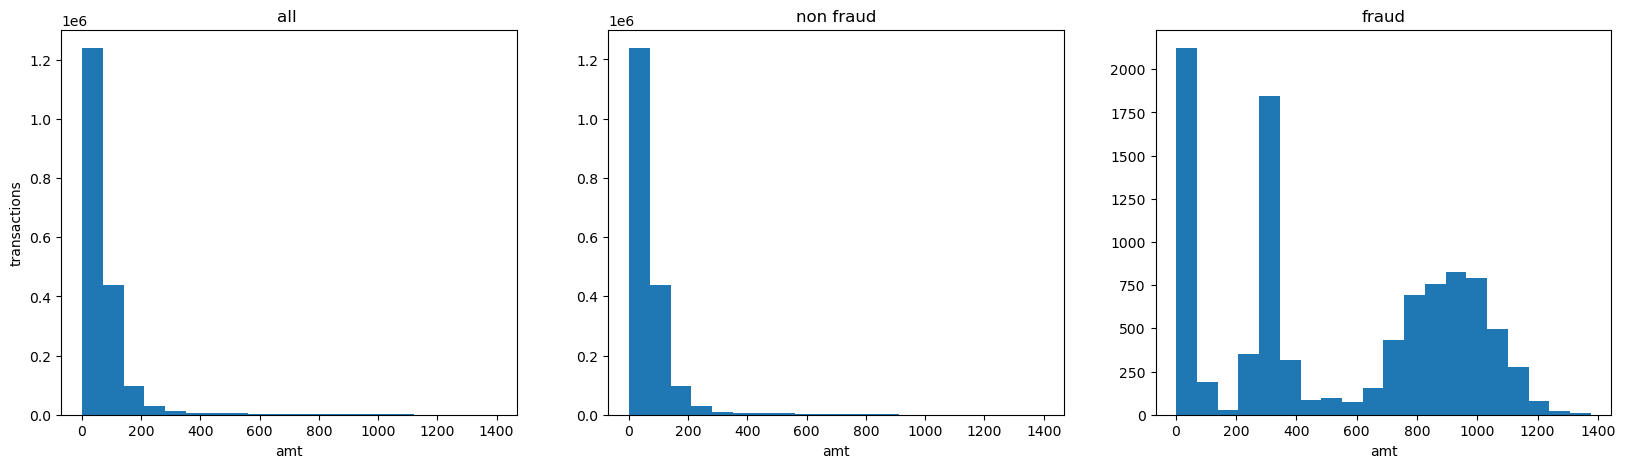

In [6]:
# amt = transcation amount

# create 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')

ax[0].set_xlabel('amt')
ax[1].set_xlabel('amt')
ax[2].set_xlabel('amt')

ax[0].set_title('all ')
ax[1].set_title('non fraud')
ax[2].set_title('fraud')

# set the amount smaller than 1400 because the max value of fraud transaction is 1376
ax[0].hist(df.loc[df['amt']<=1400, 'amt'], bins=20)
ax[1].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==0), 'amt'], bins=20)
ax[2].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==1), 'amt'], bins=20);

# ax[0] refers to graph 1, ax[1] refers to graph 2, ax[2] refers to graph 3

### ii. datetime variables

In [7]:
# trans_date_trans_time
# slice the transaction date time to date, hour, and year-month
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_ym'] = df['trans_date_trans_time'].dt.to_period('M')

In [8]:
df[['trans_date','trans_hour','trans_ym']]

,trans_date,trans_hour,trans_ym
0,2019-01-01,0,2019-01
1,2019-01-01,0,2019-01
2,2019-01-01,0,2019-01
3,2019-01-01,0,2019-01
4,2019-01-01,0,2019-01
...,...,...,...
555714,2020-12-31,23,2020-12
555715,2020-12-31,23,2020-12
555716,2020-12-31,23,2020-12
555717,2020-12-31,23,2020-12


In [9]:
df['agg'] = 1
df['index'] = df['trans_date_trans_time']
df = df.set_index('index').sort_index()

# rolling: 60 day transaction amount average by card number
df_amt_60d = df.groupby('cc_num')['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
df_amt_60d.columns = ['cc_num','trans_date','avg_amt_60d']
df_amt_60d['trans_date'] = df_amt_60d['trans_date'].dt.date
df_amt_60d = df_amt_60d.groupby(['cc_num','trans_date'])['avg_amt_60d'].min().reset_index()

# rolling: 60 day transactions by card number
df_60d = df.groupby('cc_num')['agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_60d.columns = ['cc_num','trans_date','60d']
df_60d['trans_date'] = df_60d['trans_date'].dt.date
df_60d = df_60d.groupby(['cc_num','trans_date'])['60d'].min().reset_index()

# merge by cc_num, trans_date
df = df.merge(df_amt_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')\
    .merge(df_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')
df[['avg_amt_60d','60d']]= df[['avg_amt_60d','60d']].fillna(0)

In [10]:
# create a num colum called age, which is the age of a customer
# age = trans_date_trans_time - dob
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
# np.timedelta64(1,'Y') is 1 year, which refers to a number, while datetimee refers to a date unit or time unit 

### iii. categorical variables

In [11]:
# gender
(pd.crosstab(df['gender'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
gender,,
M,0.449631,0.002565
F,0.545159,0.002645


In [12]:
# category
(pd.crosstab(df['category'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
category,,
travel,0.031203,0.000084
grocery_net,0.034929,0.000094
health_fitness,0.066059,0.000100
food_dining,0.070462,0.000111
home,0.094578,0.000143
personal_care,0.070069,0.000157
entertainment,0.072245,0.000158
kids_pets,0.087143,0.000164
misc_pos,0.061492,0.000174


In [13]:
# one hot encoding
df = pd.concat([df, pd.get_dummies(df[['gender', 'category']], drop_first=True)], axis =1)
df

# drop_first = True to avoid creating extra columns 
# use axis = 1 to horizontally concatenate two data frames along the axis 1 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,0,1,0,0,0,0,0,0,0,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,0,0,0,1,0,0,0,0,0,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,0,0,0,1,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,0,0,0,0,0,0,0,0,0,1


# Q2(a) Interactive Visualizations

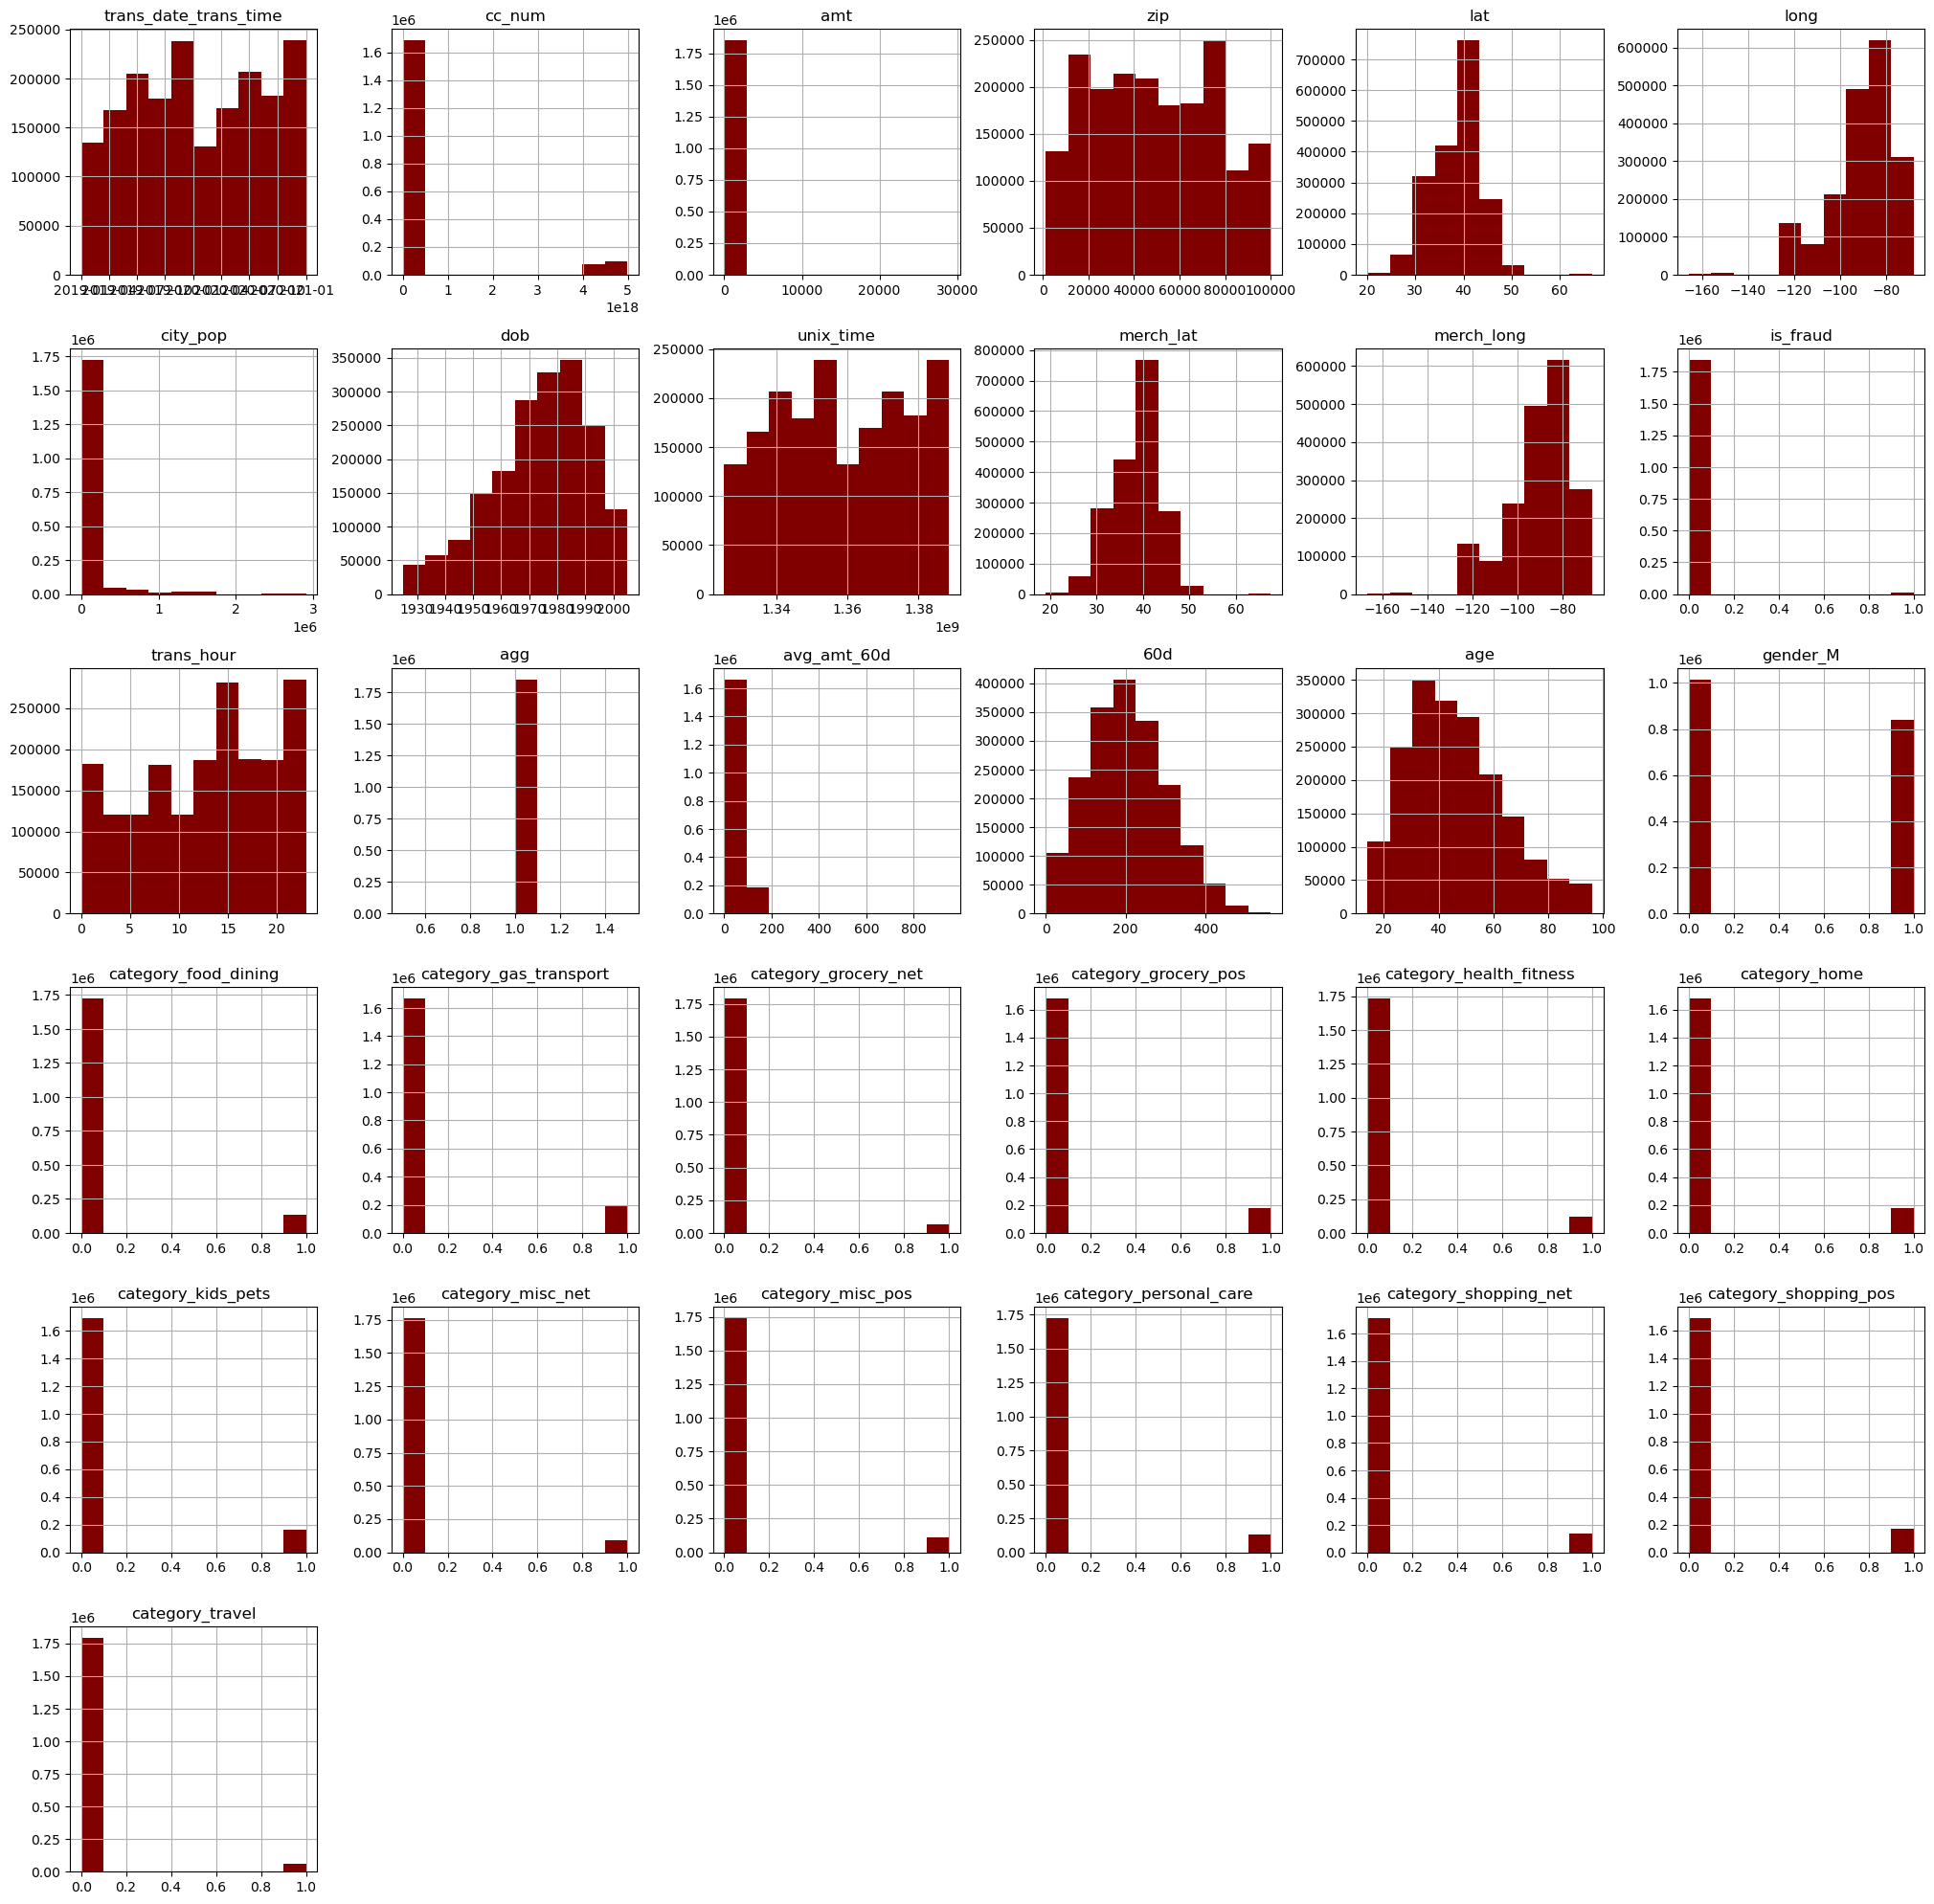

In [14]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax = ax, color = 'maroon')
pass # remove text output

In [36]:
import plotly.express as px 
fig = px.scatter_mapbox(df[df['is_fraud'] == 1], lat="lat", lon="long", hover_name="city",zoom=3, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## II. Modeling

# Q2(b) correlation

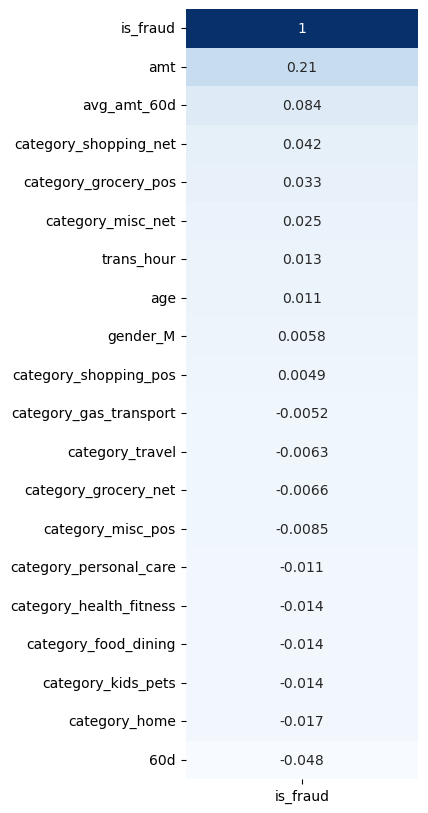

In [18]:
cols = ['amt', 'trans_hour', 'avg_amt_60d', '60d', 'age', 'gender_M', 
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']
import seaborn as sn
plt.figure(figsize=(3,10))
sn.heatmap(df[cols+['is_fraud']].corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), cmap="Blues",annot=True, cbar=False);
# amount is most correlated with is_fraud

### ii. oversampling

In [19]:
df['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [20]:
fraud_oversample = df[df['is_fraud'] == 1].sample(df[df['is_fraud'] == 0]['amt'].count(), replace=True)
df_oversampled = pd.concat([df[df['is_fraud'] == 0], fraud_oversample], axis=0)

In [21]:
df.shape

(1852394, 43)

In [22]:
df_oversampled.shape

(3685486, 43)

In [23]:
df_oversampled['is_fraud'].value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

###  iii. train test split

In [24]:
from sklearn.model_selection import train_test_split
X = df_oversampled[cols]
y = df_oversampled['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('train:')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('test:')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
    sns.heatmap(df,annot=True,fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix',y=1.1)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    return model

### iv. logistic regression

train:
[[1327677  147163]
 [ 319285 1154263]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85   1474840
           1       0.89      0.78      0.83   1473548

    accuracy                           0.84   2948388
   macro avg       0.85      0.84      0.84   2948388
weighted avg       0.85      0.84      0.84   2948388

test:
[[331307  36596]
 [ 80065 289130]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85    367903
           1       0.89      0.78      0.83    369195

    accuracy                           0.84    737098
   macro avg       0.85      0.84      0.84    737098
weighted avg       0.85      0.84      0.84    737098



LogisticRegression()

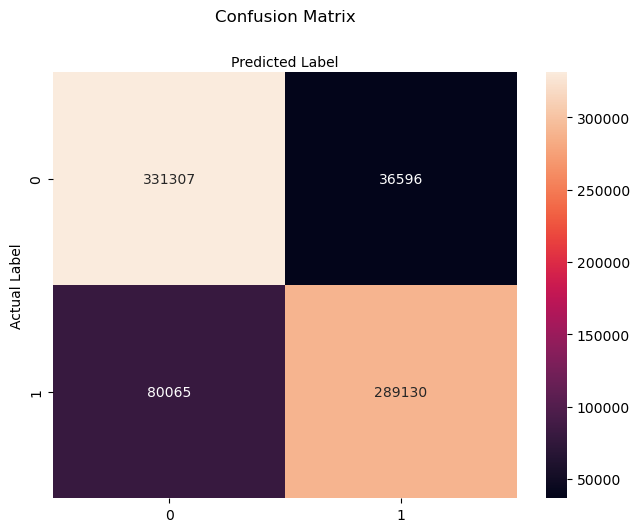

In [26]:
from sklearn.linear_model import LogisticRegression
model_results(LogisticRegression())

### v. decision tree

train:
[[1374398  100442]
 [ 242393 1231155]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89   1474840
           1       0.92      0.84      0.88   1473548

    accuracy                           0.88   2948388
   macro avg       0.89      0.88      0.88   2948388
weighted avg       0.89      0.88      0.88   2948388

test:
[[342660  25243]
 [ 60986 308209]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89    367903
           1       0.92      0.83      0.88    369195

    accuracy                           0.88    737098
   macro avg       0.89      0.88      0.88    737098
weighted avg       0.89      0.88      0.88    737098



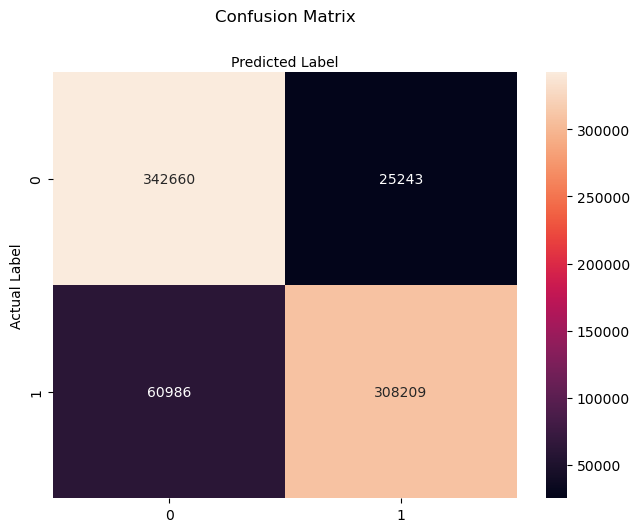

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = model_results(DecisionTreeClassifier(max_depth=3))

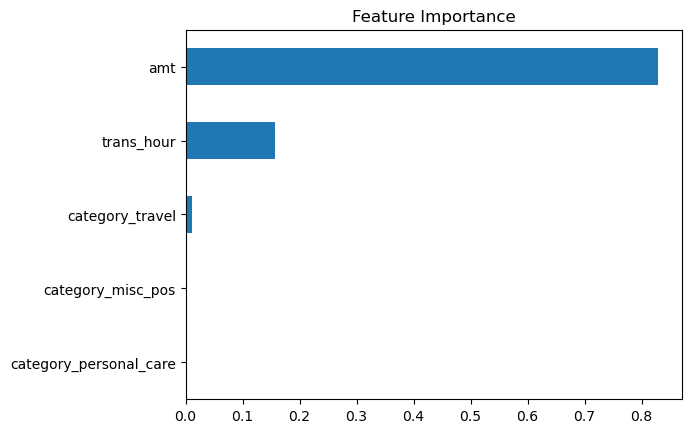

In [28]:
pd.Series(dtree.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');

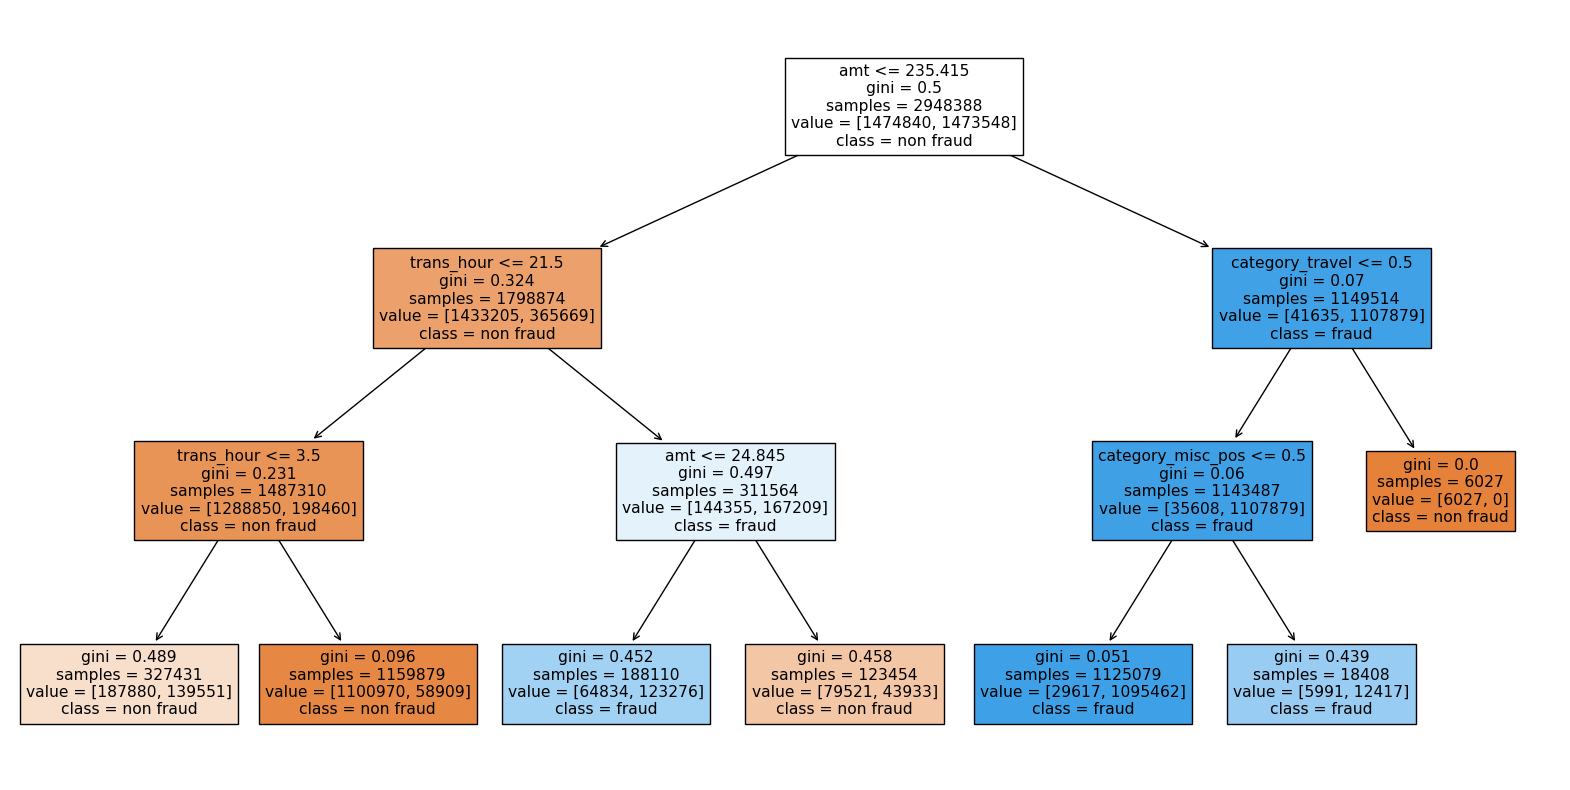

In [29]:
plt.figure(figsize=(20, 10))
from sklearn import tree
tree.plot_tree(dtree, max_depth=3, feature_names=cols, class_names=['non fraud', 'fraud'], filled=True);

### vi. random forest

train:
[[1425155   49685]
 [ 288768 1184780]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89   1474840
           1       0.96      0.80      0.88   1473548

    accuracy                           0.89   2948388
   macro avg       0.90      0.89      0.88   2948388
weighted avg       0.90      0.89      0.88   2948388

test:
[[355341  12562]
 [ 72691 296504]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89    367903
           1       0.96      0.80      0.87    369195

    accuracy                           0.88    737098
   macro avg       0.89      0.88      0.88    737098
weighted avg       0.89      0.88      0.88    737098



RandomForestClassifier(max_depth=3, n_estimators=10)

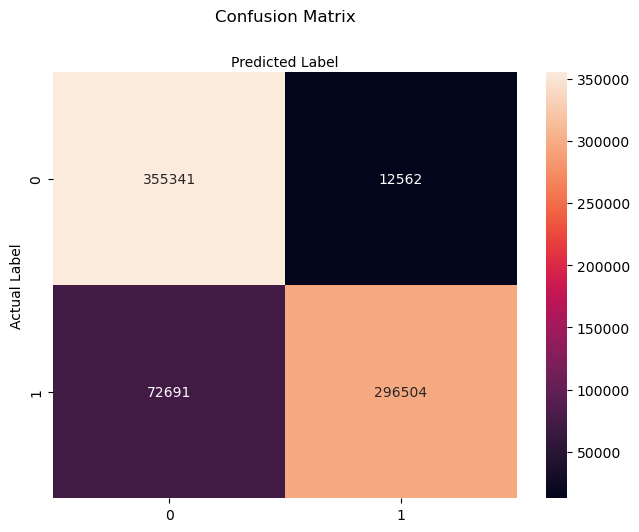

In [30]:
from sklearn.ensemble import RandomForestClassifier
model_results(RandomForestClassifier(n_estimators=10, max_depth=3))

### vii. xgboost

train:
[[1420455   54385]
 [ 101186 1372362]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95   1474840
           1       0.96      0.93      0.95   1473548

    accuracy                           0.95   2948388
   macro avg       0.95      0.95      0.95   2948388
weighted avg       0.95      0.95      0.95   2948388

test:
[[354138  13765]
 [ 25379 343816]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95    367903
           1       0.96      0.93      0.95    369195

    accuracy                           0.95    737098
   macro avg       0.95      0.95      0.95    737098
weighted avg       0.95      0.95      0.95    737098



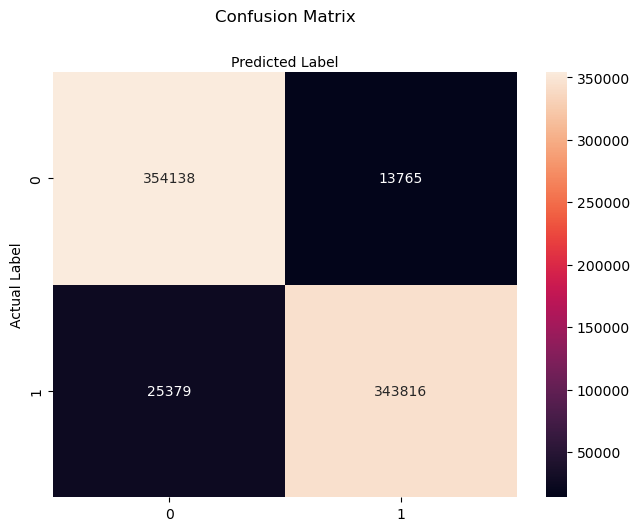

In [31]:
from xgboost import XGBClassifier
model_results(XGBClassifier(n_estimators=10, max_depth=3));